In [1]:
import urllib.request
import pandas as pd
import matplotlib

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7f2743918610>)

In [3]:
checkouts_df = pd.read_csv(checkout_file)

In [4]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,NaN,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",NaN,Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,EBOOK,2018,1,1,"Immortal: Fallen Angels Series, Book 6",NaN,J.R. Ward,"Fantasy, Fiction, Romance","Penguin Group (USA), Inc.",2014
9996,Digital,OverDrive,EBOOK,2018,1,1,The Price of Silence,NaN,Kate Wilhelm,"Fiction, Suspense, Thriller","Harlequin Enterprises, Ltd.",2011
9997,Digital,Freegal,SONG,2018,1,1,Desert Hideaway,NaN,NaN,NaN,NaN,NaN
9998,Physical,Horizon,BOOK,2018,1,3,Waistcoats & weaponry / Gail Carriger.,NaN,"Carriger, Gail","Boarding schools Fiction, Schools Fiction, Eti...","Little, Brown and Company,",2014.


# Allgemeines

In [5]:
# Im vorliegenden Datensatz haben wir nur Werte des Jahres 2018
checkouts_df["checkoutyear"].value_counts()

checkoutyear
2018    10000
Name: count, dtype: int64

In [6]:
# Zeigt mir, dass wir mehrere Monate des Jahres enthalten haben. Fehlend: Monat 6 und 7
checkouts_df["checkoutmonth"].value_counts()

checkoutmonth
1     9930
12      27
3       19
2       12
8        3
4        2
5        2
9        2
11       2
10       1
Name: count, dtype: int64

## Frage 1

Wie ist die Ausleiherteilung pro materialtype? Unter anderem im Januar und Dezember?

In [7]:
checkouts_df["materialtype"].value_counts()
# Hier sieht man die Ausleihverteilugn pro Medientyp im Jahre 2018

materialtype
BOOK                    4268
EBOOK                   2084
AUDIOBOOK                857
SOUNDDISC                839
VIDEODISC                806
SONG                     707
MUSIC                    139
MOVIE                     94
TELEVISION                85
COMIC                     62
SOUNDDISC, VIDEODISC      10
MAGAZINE                  10
SOUNDREC                   8
REGPRINT                   7
VIDEO                      5
CR                         4
ER, SOUNDDISC              3
ER                         3
MAP                        3
ATLAS                      2
LARGEPRINT                 1
VIDEOCASS, VIDEODISC       1
SOUNDCASS                  1
ER, VIDEODISC              1
Name: count, dtype: int64

In [8]:
january_AS = checkouts_df[checkouts_df["checkoutmonth"] == 1]
# AS = Ausleihstatistik

In [9]:
january_AS

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,EBOOK,2018,1,22,Enemy of the State,NaN,Vince Flynn,"Fiction, Literature, Thriller","Simon & Schuster, Inc.",2017
1,Digital,Hoopla,TELEVISION,2018,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle,NaN,NaN,Children's,DHX Media,NaN
2,Physical,Horizon,SOUNDDISC,2018,1,1,Mono / the Mavericks.,NaN,Mavericks (Musical group),Country music 2011 2020,"Valory,",[2015]
3,Digital,OverDrive,EBOOK,2018,1,2,Anna Karenina,NaN,Leo Tolstoy,"Classic Literature, Fiction, Literature","Penguin Group (USA), Inc.",2009
4,Digital,OverDrive,EBOOK,2018,1,1,"Dragon: Vlad Series, Book 8",NaN,Steven Brust,"Fantasy, Fiction",Macmillan Publishers,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Digital,OverDrive,EBOOK,2018,1,1,"Immortal: Fallen Angels Series, Book 6",NaN,J.R. Ward,"Fantasy, Fiction, Romance","Penguin Group (USA), Inc.",2014
9996,Digital,OverDrive,EBOOK,2018,1,1,The Price of Silence,NaN,Kate Wilhelm,"Fiction, Suspense, Thriller","Harlequin Enterprises, Ltd.",2011
9997,Digital,Freegal,SONG,2018,1,1,Desert Hideaway,NaN,NaN,NaN,NaN,NaN
9998,Physical,Horizon,BOOK,2018,1,3,Waistcoats & weaponry / Gail Carriger.,NaN,"Carriger, Gail","Boarding schools Fiction, Schools Fiction, Eti...","Little, Brown and Company,",2014.


In [10]:
january_AS["materialtype"].value_counts()
# Hier sieht man die Ausleihstatistik von Januar - unter auch dargestellt als Balkendiagramm

materialtype
BOOK                    4249
EBOOK                   2059
AUDIOBOOK                849
SOUNDDISC                833
VIDEODISC                806
SONG                     703
MUSIC                    139
MOVIE                     93
TELEVISION                83
COMIC                     57
SOUNDDISC, VIDEODISC      10
MAGAZINE                  10
SOUNDREC                   8
REGPRINT                   7
VIDEO                      5
CR                         4
ER, SOUNDDISC              3
ER                         3
MAP                        3
ATLAS                      2
LARGEPRINT                 1
VIDEOCASS, VIDEODISC       1
SOUNDCASS                  1
ER, VIDEODISC              1
Name: count, dtype: int64

<Axes: ylabel='materialtype'>

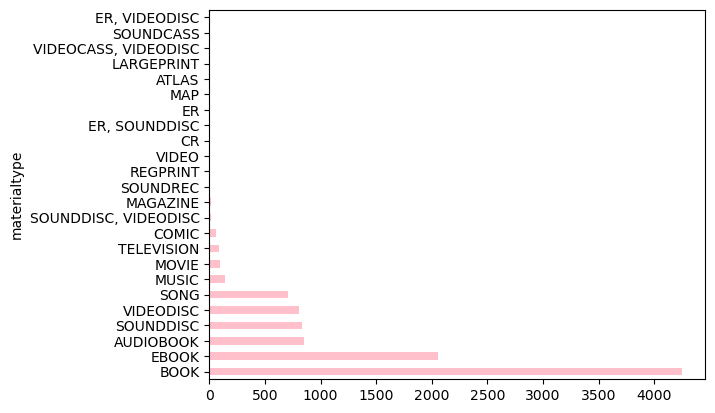

In [11]:
january_AS["materialtype"].value_counts().plot.barh(color="pink")

In [12]:
december_AS = checkouts_df[checkouts_df["checkoutmonth"] == 12]

In [13]:
december_AS

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
50,Digital,OverDrive,EBOOK,2018,12,3,Love Is Murder,NaN,Sandra Brown,"Fiction, Thriller, Thriller","Harlequin Enterprises, Ltd.",2013
51,Digital,OverDrive,EBOOK,2018,12,3,Monkey Play,NaN,Alyssa Satin Capucilli,"Beginning Reader, Juvenile Fiction","Random House, Inc.",2013
52,Digital,OverDrive,EBOOK,2018,12,1,The History of Cuba,NaN,Clifford L. Staten,"History, Nonfiction",ABC-CLIO,2010
53,Digital,OverDrive,EBOOK,2018,12,2,First Date,NaN,Krista McGee,"Christian Fiction, Romance, Young Adult Fiction",Thomas Nelson Inc.,2012
54,Physical,Horizon,SOUNDDISC,2018,12,2,Pure funk.,NaN,NaN,"Disco music, Funk Music, Popular music 1971 19...","PolyGram TV,",[1998]
55,Digital,OverDrive,AUDIOBOOK,2018,12,3,I Liked My Life: A Novel (unabridged) (Unabrid...,NaN,Abby Fabiaschi,"Fiction, Literature",Macmillan Audio,2017
56,Digital,OverDrive,EBOOK,2018,12,1,The Story of French,NaN,Jean-Benoit Nadeau,"History, Language Arts, Nonfiction",Macmillan Publishers,2013
57,Physical,Horizon,BOOK,2018,12,8,The only story / Julian Barnes.,NaN,"Barnes, Julian","Man woman relationships Fiction, Psychological...","Alfred A. Knopf,",[2018]
58,Physical,Horizon,BOOK,2018,12,1,Caesar and Christ; a history of Roman civiliza...,NaN,"Durant, Will, 1885-1981","Civilization History, Rome Civilization","Simon & Schuster,",1944.
59,Physical,Horizon,BOOK,2018,12,1,Dark magic / Christine Feehan.,NaN,"Feehan, Christine","Magicians Fiction, Vampires Fiction, New Orlea...","Avon,",[2010]


In [14]:
december_AS["materialtype"].value_counts()
# Hier sieht man die Ausleihstatistik vaus Dezember und unten dargestellt als Histogranm

materialtype
BOOK         13
EBOOK        10
AUDIOBOOK     3
SOUNDDISC     1
Name: count, dtype: int64

<Axes: >

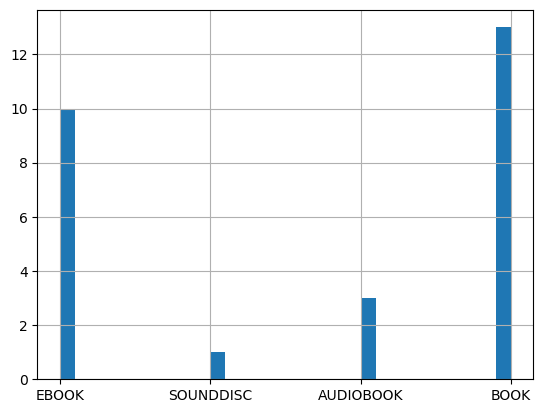

In [15]:
december_AS["materialtype"].hist(bins=30)

## Frage 2

Welcher Monat hatte die Meisten Ausleihen? Welche Titel wurde in diesem Monat am meisten entliehen?

In [16]:
checkouts_df["checkoutmonth"].value_counts()
# Die meisten Ausleihen hatte der Januar

checkoutmonth
1     9930
12      27
3       19
2       12
8        3
4        2
5        2
9        2
11       2
10       1
Name: count, dtype: int64

In [17]:
month_and_titles = checkouts_df[["checkoutmonth", "checkouts", "title"]]

In [18]:
month_and_titles

,checkoutmonth,checkouts,title
0,1,22,Enemy of the State
1,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle
2,1,1,Mono / the Mavericks.
3,1,2,Anna Karenina
4,1,1,"Dragon: Vlad Series, Book 8"
...,...,...,...
9995,1,1,"Immortal: Fallen Angels Series, Book 6"
9996,1,1,The Price of Silence
9997,1,1,Desert Hideaway
9998,1,3,Waistcoats & weaponry / Gail Carriger.


In [19]:
january = month_and_titles[month_and_titles["checkoutmonth"] == 1]

In [20]:
january

,checkoutmonth,checkouts,title
0,1,22,Enemy of the State
1,1,1,Newspaper Mom / Cucumber in Rio / Donut Raffle
2,1,1,Mono / the Mavericks.
3,1,2,Anna Karenina
4,1,1,"Dragon: Vlad Series, Book 8"
...,...,...,...
9995,1,1,"Immortal: Fallen Angels Series, Book 6"
9996,1,1,The Price of Silence
9997,1,1,Desert Hideaway
9998,1,3,Waistcoats & weaponry / Gail Carriger.


In [21]:
january_titlemax = january["checkouts"].max()

In [22]:
january_titlemax
# Ein Titel wurde im Januar 540 mal ausgeliehen

540

In [23]:
checkouts_df[checkouts_df["checkouts"]==540]
# Folgender Titel wurde im Januar am meisten ausgeliehen

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
6638,Physical,Horizon,BOOK,2018,1,540,In the midst of winter : a novel / Isabel Alle...,NaN,"Allende, Isabel","College teachers Fiction, Women college teache...","Atria Books,",2017.


## Frage 3

Wie viele Medien wurden vom Autor Masashi Kishimoto entliehen?

In [24]:
value = "Kishimoto, Masashi, 1974-"
# Hatte ich leider nur durch die vorgegebene Beispieldatei, sonst wäre ich da vmtl. nicht von alleine drauf gekommen

In [25]:
result = checkouts_df[checkouts_df["creator"] == value]

In [26]:
result

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
9257,Physical,Horizon,BOOK,2018,1,1,"Naruto. Vol. 32, The search for Sasuke / story...",NaN,"Kishimoto, Masashi, 1974-","Ninja Japan Comic books strips etc, Imaginary ...","Viz Media,",2008.
9962,Physical,Horizon,BOOK,2018,1,4,"Naruto. Vol. 7, The path you should tread / st...",NaN,"Kishimoto, Masashi, 1974-","Ninja Japan Comic books strips etc, Comic book...","Viz,",2005.


In [ ]:
# Es wurden nur 2 Medien von diesem Autor entliehen